# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [1]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
# import warnings
# warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [2]:
# run this cell to upload file using GUI if you are using google colab

# from google.colab import files
# files.upload()

In [3]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [4]:
import pandas as pd
import os

In [5]:
os.getcwd()
# get working directory

'/content'

In [6]:
os.chdir('/content/drive/MyDrive/Intro to Neural Nets 2/Lab Assignment')
# changing working directory

In [7]:
os.getcwd()

'/content/drive/MyDrive/Intro to Neural Nets 2/Lab Assignment'

In [8]:
df = pd.read_csv('prices.csv')

In [9]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 2

### Drop null
- Drop null values if any

In [10]:
df.isna().sum()
# checking for null values in each column

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

Since, there are no null values - no need to drop anything

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [11]:
df1 = df.drop(axis=1, columns={'date','symbol','volume'})
df1.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


## Question 3

### Print the dataframe
- print the modified dataframe

In [12]:
df1

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002
...,...,...,...,...
851259,103.309998,103.199997,102.849998,103.930000
851260,43.070000,43.040001,42.689999,43.310001
851261,53.639999,53.529999,53.270000,53.740002
851262,44.730000,45.450001,44.410000,45.590000


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [13]:
X = df1.drop(axis=1,columns='close')
y = df1['close']

In [14]:
X.head()

,open,low,high
0,123.430000,122.309998,126.250000
1,125.239998,119.940002,125.540001
2,116.379997,114.930000,119.739998
3,115.480003,113.500000,117.440002
4,117.010002,114.089996,117.330002


In [15]:
y.head()

0    125.839996
1    119.980003
2    114.949997
3    116.620003
4    114.970001
Name: close, dtype: float64

## Question 4

### Create train and test sets
- Split the data into training and testing

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state=10)

In [20]:
X_train.shape

(595884, 3)

In [21]:
X_test.shape

(255380, 3)

In [22]:
y_train.shape

(595884,)

In [23]:
y_test.shape

(255380,)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [26]:
X_train_sc

array([[-0.18066333, -0.17499134, -0.18062612],
       [ 1.07367034,  1.05975655,  1.05661349],
       [ 0.93261591,  0.94551272,  0.94321271],
       ...,
       [ 0.07817502,  0.08097235,  0.07656551],
       [ 0.20836981,  0.21244906,  0.20013579],
       [-0.19438687, -0.19644215, -0.19635322]])

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [29]:
type(X_train_sc)
# checking type

numpy.ndarray

Already a np array - no change needed

In [28]:
type(y_train)
# checking type

pandas.core.series.Series

In [32]:
import numpy as np
y_train = np.array(y_train)
y_test = np.array(y_test)
# changing type as np array

In [33]:
type(y_train)

numpy.ndarray

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [35]:
model = Sequential(
    [Flatten(),
     Dense(1, activation='linear')]
)

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [36]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD()
model.compile(optimizer=sgd,loss='MSE',metrics='accuracy')

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [37]:
model.fit(x=X_train_sc, y=y_train, batch_size=128, epochs=50, callbacks=None, validation_data=(X_test_sc,y_test), initial_epoch=0)

Epoch 1/50
4656/4656 [==============================] - 5s 1ms/step - loss: 238.0744 - accuracy: 2.0497e-06 - val_loss: 0.9775 - val_accuracy: 0.0000e+00
Epoch 2/50
4656/4656 [==============================] - 4s 936us/step - loss: 0.9749 - accuracy: 3.5970e-06 - val_loss: 0.9717 - val_accuracy: 0.0000e+00
Epoch 3/50
4656/4656 [==============================] - 4s 941us/step - loss: 0.9921 - accuracy: 3.8846e-06 - val_loss: 0.9663 - val_accuracy: 0.0000e+00
Epoch 4/50
4656/4656 [==============================] - 4s 928us/step - loss: 0.9615 - accuracy: 8.3416e-06 - val_loss: 0.9578 - val_accuracy: 0.0000e+00
Epoch 5/50
4656/4656 [==============================] - 5s 967us/step - loss: 0.9463 - accuracy: 2.4742e-06 - val_loss: 0.9544 - val_accuracy: 0.0000e+00
Epoch 6/50
4656/4656 [==============================] - 4s 928us/step - loss: 0.9167 - accuracy: 8.9090e-07 - val_loss: 0.9447 - val_accuracy: 0.0000e+00
Epoch 7/50
4656/4656 [==============================] - 4s 941us/step - loss

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [41]:
model.evaluate(X_test_sc,y_test)
# evaluation in terms of loss

7981/7981 [==============================] - 5s 611us/step - loss: 0.7261 - accuracy: 0.0000e+00


[0.7261055707931519, 0.0]

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [38]:
# checking expected input shape of the model
model.input

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'flatten_input')>

In [45]:
model.predict(scaler.transform([[109.21,96.99,178.87]]))

array([[134.1858]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [46]:
import tensorflow as tf

In [51]:
(trainX,trainy),(testX,testy) = tf.keras.datasets.fashion_mnist.load_data()

### Change train and test labels into one-hot vectors

In [52]:
trainX.shape

(60000, 28, 28)

In [53]:
trainy.shape

(60000,)

In [54]:
trainy[0]

9

In [55]:
trainy = tf.keras.utils.to_categorical(trainy, num_classes=10)
testy = tf.keras.utils.to_categorical(testy, num_classes=10)
# changing labels into one-hot vectors

In [56]:
trainy[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Build the Graph

### Initialize model, reshape & normalize data

In [136]:
tf.keras.backend.clear_session()
# clear any existing model in memory
model2 = tf.keras.Sequential()
# initilaizing Sequential model

In [137]:
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
# reshape layer

In [138]:
model2.add(tf.keras.layers.BatchNormalization())
# data normalization layer

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [139]:
model2.add(tf.keras.layers.Dense(200,activation='relu'))
# first hidden layer with 200 neurons

In [140]:
model2.add(tf.keras.layers.Dense(100,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.25))
# second hidden layer with 100 neurons and a 25% dropout

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

###Also add callback, such that if validation loss doesn't decreases consecutively 2 times, stop the training

In [141]:
model2.add(tf.keras.layers.Dense(10,activation='softmax'))
# output layer

In [142]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=adam,loss='categorical_crossentropy',metrics='accuracy')
# compiling model

In [143]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)
# added callback with patience as 2

### Print model summary

In [144]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
______________________________________________

###Train your model, use test data as validation set

In [145]:
modelrun = model2.fit(x=trainX,
          y=trainy,
          validation_data=(testX,testy),
          initial_epoch=0,
          epochs=30,
          batch_size=32,
          callbacks=callback)
# training model

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6238 - accuracy: 0.7777 - val_loss: 0.4120 - val_accuracy: 0.8473
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3990 - accuracy: 0.8544 - val_loss: 0.3836 - val_accuracy: 0.8587
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3649 - accuracy: 0.8668 - val_loss: 0.3705 - val_accuracy: 0.8681
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3284 - accuracy: 0.8787 - val_loss: 0.3905 - val_accuracy: 0.8640
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3092 - accuracy: 0.8841 - val_loss: 0.3681 - val_accuracy: 0.8730
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2983 - accuracy: 0.8877 - val_loss: 0.3400 - val_accuracy: 0.8783
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2840 - accuracy: 0.8938 - val_loss: 0.3514 - val_accuracy:

###Predict Labels

In [146]:
pred = model2.predict(testX)

In [147]:
predy = np.argmax(pred,axis=1)
# class labels with highest probability as per Softmax

In [148]:
predy

array([9, 2, 1, ..., 8, 1, 5])

###Print Confusion matrix

In [149]:
from sklearn.metrics import confusion_matrix

In [150]:
(trainX_1,trainy_1),(testX_1,testy_1) = tf.keras.datasets.fashion_mnist.load_data()
# importing data again since testy was overwritten with OHE values

In [151]:
confusion_matrix(testy_1,predy)

array([[799,   0,  12,  25,   6,   1, 150,   0,   7,   0],
       [  3, 968,   2,  21,   3,   0,   2,   0,   1,   0],
       [ 10,   0, 778,  11, 140,   0,  61,   0,   0,   0],
       [ 12,   3,   6, 898,  48,   0,  32,   0,   1,   0],
       [  0,   0,  67,  13, 886,   0,  34,   0,   0,   0],
       [  1,   0,   0,   0,   0, 944,   0,  37,   3,  15],
       [ 96,   0, 100,  32,  85,   0, 677,   0,  10,   0],
       [  0,   0,   0,   0,   0,   8,   0, 976,   0,  16],
       [  4,   0,   5,   6,   6,   3,   5,   7, 964,   0],
       [  0,   0,   0,   0,   0,  11,   1,  58,   1, 929]])

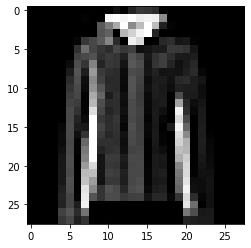

In [152]:
import matplotlib.pyplot as plt
plt.imshow(testX_1[6],cmap='gray')
# checking image of class 6 where we have a lot of misclassifications
# the accuracy needs to be improved for this class

###Plot training accuracy vs validation accuracy
###Plot training loss vs validation loss

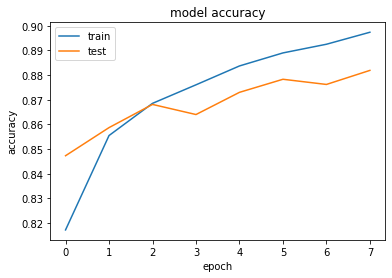

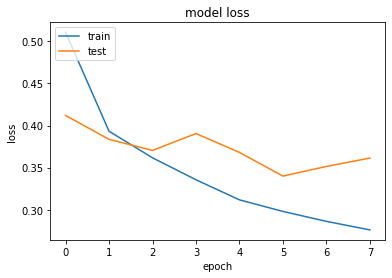

In [153]:
import matplotlib.pyplot as plt

plt.plot(modelrun.history['accuracy'])
plt.plot(modelrun.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(modelrun.history['loss'])
plt.plot(modelrun.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()